`tfcausalimpact` and its dependency `tensorflow` / `tensorflow-macos` need to be manually installed using pip, depending on the OS.

In [8]:
%load_ext autoreload
%autoreload complete

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tutorial

In [2]:
import pandas as pd
from causalimpact import CausalImpact

In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/arma_data.csv"
)[["y", "X"]]
data.head()

y           X
0  118.188694   99.795292
1  120.233276  100.663180
2  118.627775   98.883699
3  119.609722  100.448941
4  121.391508  101.561734

In [3]:
data.iloc[70:, 0] += 5

pre_period = [0, 69]
post_period = [70, 99]

In [4]:
ci = CausalImpact(data, pre_period, post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2023-04-16 18:14:26.883171: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


In [5]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.35 (0.3)       3610.5 (8.89)
95% CI                    [119.78, 120.94]   [3593.25, 3628.09]

Absolute effect (s.d.)    4.88 (0.3)         146.37 (8.89)
95% CI                    [4.29, 5.45]       [128.77, 163.61]

Relative effect (s.d.)    4.05% (0.25%)      4.05% (0.25%)
95% CI                    [3.57%, 4.53%]     [3.57%, 4.53%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [6]:
print(ci.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.35.
The 95% interval of this counterfactual prediction is [119.78, 120.94].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.88 with a 95% interval of
[4.29, 5.45]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3756.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 3610.5. The 95% interval of this prediction is [3593.25, 3628.09].


The above results are given in terms of absolute numbers. In relative
terms, the response va

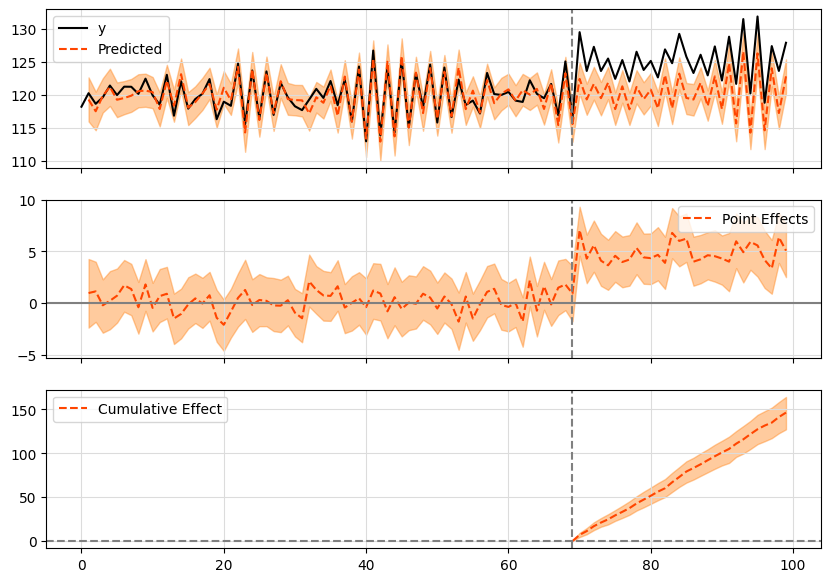

In [7]:
ci.plot()

## On news coverage data

In [5]:
from datetime import datetime

from protest_impact.synthetic_region import get_regional_counts_for_protest

region = "Berlin"

event = dict(
    event_date=datetime(2021, 6, 1),
    admin1=region,
    size=1000,
)

split = 7 * 4 * 6

df = get_regional_counts_for_protest(
    "klima*",
    event,
    pd.DataFrame([event]),
    source="mediacloud",
    n_days_train=split,
    n_days_predict=7 * 2,
    n_days_protest_free_pre=0,
    n_days_protest_free_post=0,
    min_control_regions=1,
    min_count=3,
)

df = (
    df.pivot(index="date", columns="region", values="count")
    .fillna(0)
    .reset_index()
    .drop(columns=["date"])
)

df = df[[region] + [c for c in df.columns if c != region]]

df.head()

region  Berlin  Bayern  Brandenburg  Bremen  Hamburg  Hessen  Niedersachsen  \
0           23     105            4       1       18     116             69   
1           31      65            4       6       13      70             43   
2           25      77            4       7       18      48             64   
3           25      96            4       2       13     104             63   
4           13      30            4       0       14      38             53   

region  Nordrhein-Westfalen  Rheinland-Pfalz  Saarland  Sachsen  \
0                        96               15         6       21   
1                        86               10         5        8   
2                        93                8         4       12   
3                        76               18         6       15   
4                        29                5         3       14   

region  Schleswig-Holstein  
0                       11  
1                        9  
2                       15  
3                       14  
4                       11

In [77]:
ci = CausalImpact(df, [0, split - 1], [split, len(df) - 1])

In [78]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54.79              767.0
Prediction (s.d.)         51.47 (4.13)       720.64 (57.8)
95% CI                    [44.18, 60.36]     [618.46, 845.02]

Absolute effect (s.d.)    3.31 (4.13)        46.36 (57.8)
95% CI                    [-5.57, 10.61]     [-78.02, 148.54]

Relative effect (s.d.)    6.43% (8.02%)      6.43% (8.02%)
95% CI                    [-10.83%, 20.61%]  [-10.83%, 20.61%]

Posterior tail-area probability p: 0.19
Posterior prob. of a causal effect: 80.72%

For more details run the command: print(impact.summary('report'))


In [79]:
print(ci.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 54.79. In the absence of an
intervention, we would have expected an average response of 51.47.
The 95% interval of this counterfactual prediction is [44.18, 60.36].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 3.31 with a 95% interval of
[-5.57, 10.61]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 767.0.
Had the intervention not taken place, we would have expected
a sum of 720.64. The 95% interval of this prediction is [618.46, 845.02].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +6.

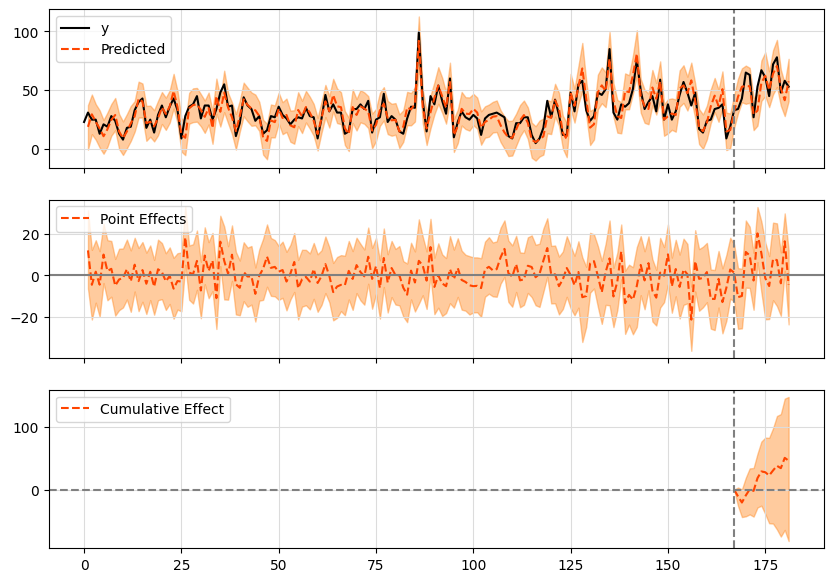

In [80]:
ci.plot()

<Axes: >

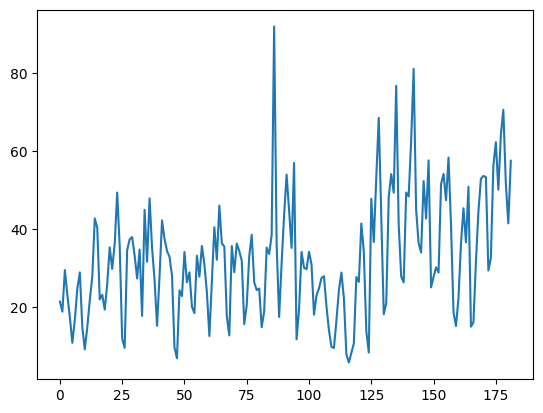

In [85]:
ci.inferences.complete_preds_means.plot()

<Axes: >

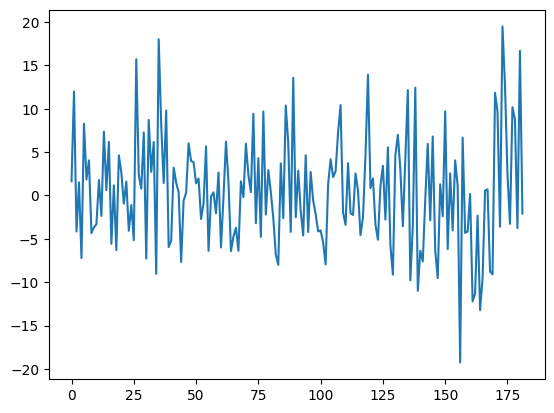

In [14]:
ci.inferences.point_effects_means.plot()

<Axes: >

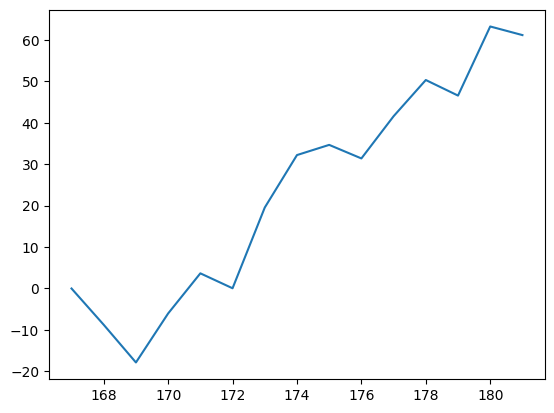

In [15]:
ci.inferences.post_cum_effects_means.plot()

In [17]:
ci.inferences.post_cum_effects_means.iloc[-1]

61.144813537597656

In [20]:
ci = CausalImpact(df, [0, split - 1], [split, len(df) - 1], model_args=dict(nseasons=7))

In [21]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54.79              767.0
Prediction (s.d.)         46.18 (3.1)        646.46 (43.44)
95% CI                    [40.57, 52.73]     [567.91, 738.21]

Absolute effect (s.d.)    8.61 (3.1)         120.54 (43.44)
95% CI                    [2.06, 14.22]      [28.79, 199.09]

Relative effect (s.d.)    18.65% (6.72%)     18.65% (6.72%)
95% CI                    [4.45%, 30.8%]     [4.45%, 30.8%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.6%

For more details run the command: print(impact.summary('report'))


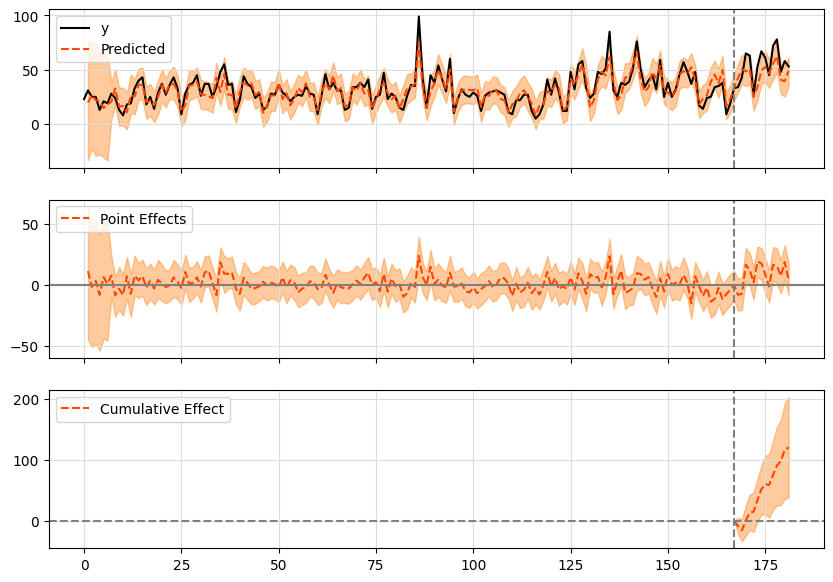

In [22]:
ci.plot()

In [23]:
ci = CausalImpact(
    df,
    [0, split - 1],
    [split, len(df) - 1],
    model_args=dict(nseasons=7, fit_method="hmc"),
)

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [25]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54.79              767.0
Prediction (s.d.)         48.5 (2.34)        679.03 (32.74)
95% CI                    [43.85, 53.01]     [613.86, 742.2]

Absolute effect (s.d.)    6.28 (2.34)        87.97 (32.74)
95% CI                    [1.77, 10.94]      [24.8, 153.14]

Relative effect (s.d.)    12.95% (4.82%)     12.95% (4.82%)
95% CI                    [3.65%, 22.55%]    [3.65%, 22.55%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.7%

For more details run the command: print(impact.summary('report'))


In [26]:
ci = CausalImpact(
    df,
    [0, split - 1],
    [split, len(df) - 1],
    model_args=dict(nseasons=7, fit_method="vi"),
)

In [24]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54.79              767.0
Prediction (s.d.)         48.5 (2.34)        679.03 (32.74)
95% CI                    [43.85, 53.01]     [613.86, 742.2]

Absolute effect (s.d.)    6.28 (2.34)        87.97 (32.74)
95% CI                    [1.77, 10.94]      [24.8, 153.14]

Relative effect (s.d.)    12.95% (4.82%)     12.95% (4.82%)
95% CI                    [3.65%, 22.55%]    [3.65%, 22.55%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.7%

For more details run the command: print(impact.summary('report'))


hmc is much slower and not much better than vi.

Longer prediction intervals:

In [46]:
def get_ci(n_days_predict):
    df = get_regional_counts_for_protest(
        "klima*",
        event,
        pd.DataFrame([event]),
        source="mediacloud",
        n_days_train=split,
        n_days_predict=n_days_predict,
        n_days_protest_free_pre=0,
        n_days_protest_free_post=0,
        min_control_regions=1,
        min_count=3,
    )

    df = (
        df.pivot(index="date", columns="region", values="count")
        .fillna(0)
        .reset_index()
        .drop(columns=["date"])
    )

    df = df[[region] + [c for c in df.columns if c != region]]

    ci = CausalImpact(
        df, [0, split - 1], [split, len(df) - 1], model_args=dict(nseasons=7)
    )

    return ci

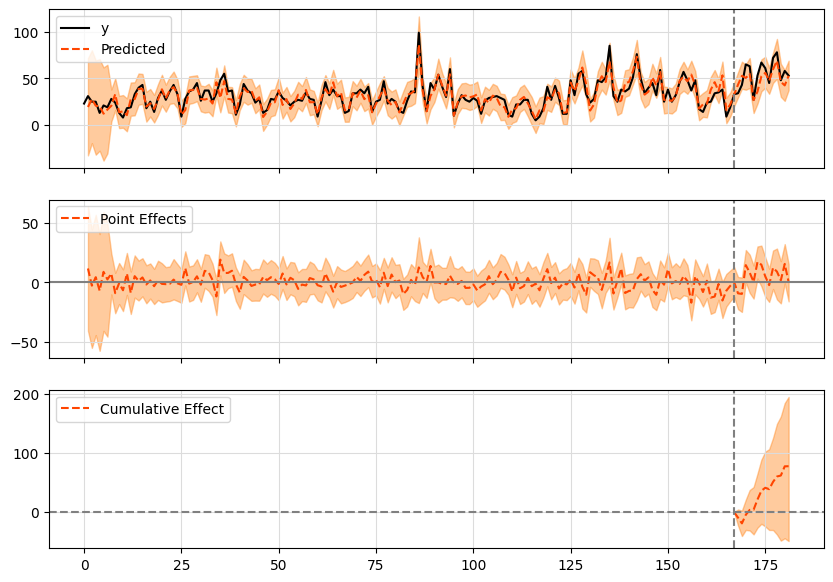

In [47]:
ci = get_ci(7 * 2)
ci.plot()

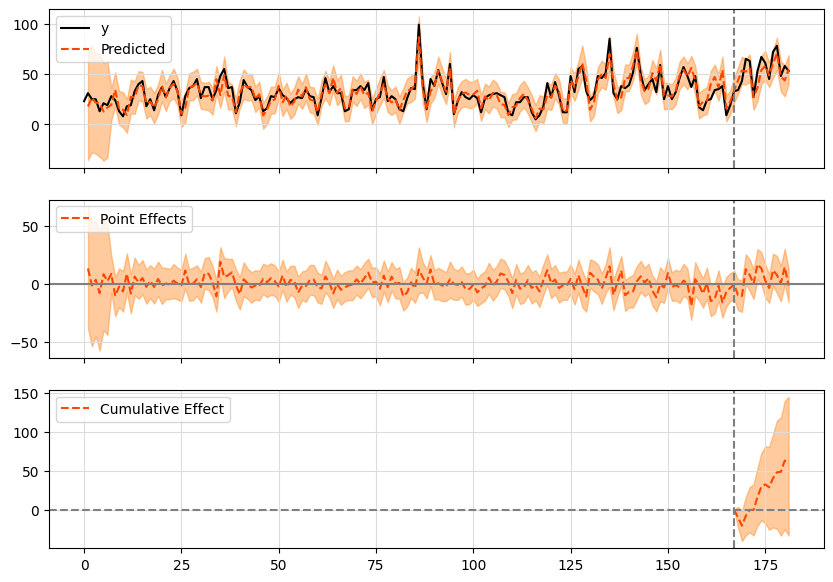

In [48]:
ci = get_ci(7 * 2)
ci.plot()

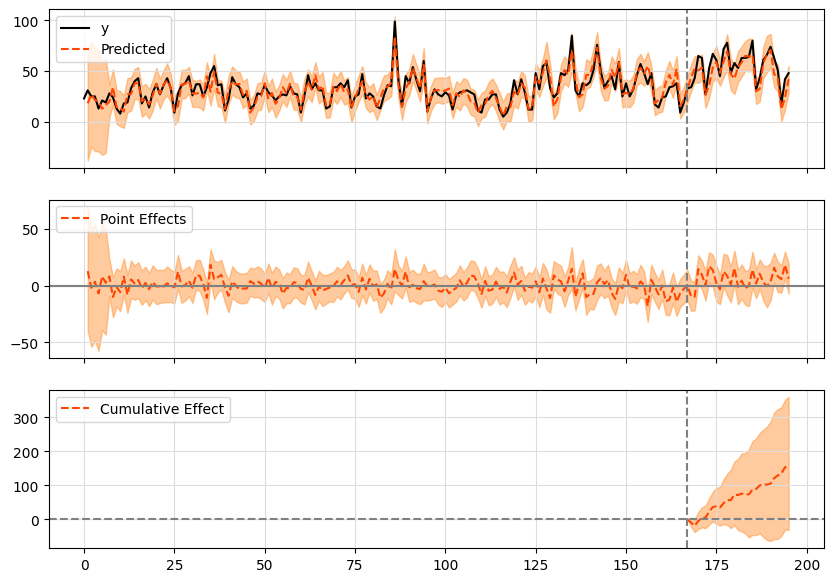

In [49]:
ci = get_ci(7 * 4)
ci.plot()

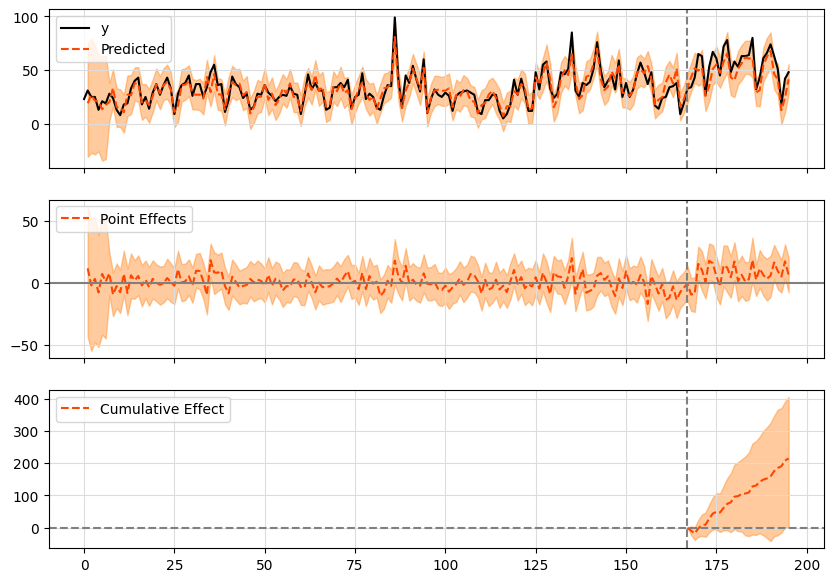

In [50]:
ci = get_ci(7 * 4)
ci.plot()

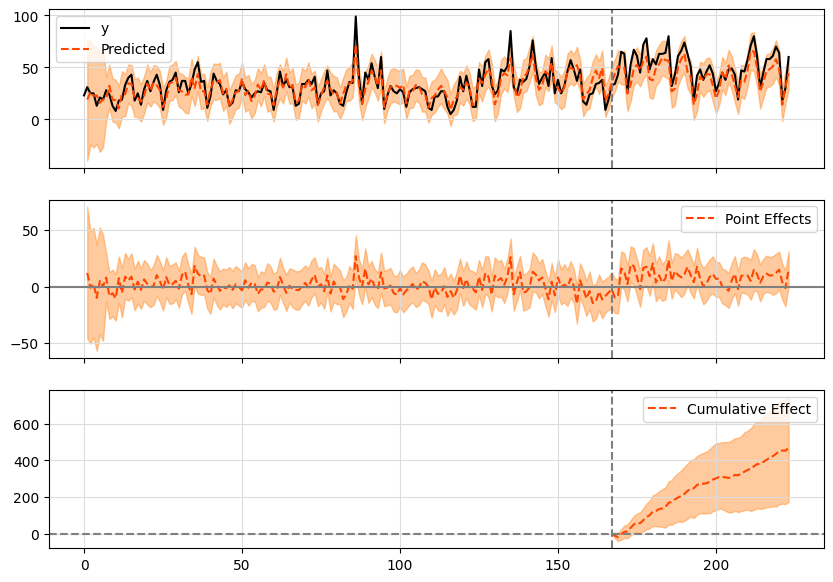

In [51]:
ci = get_ci(7 * 8)
ci.plot()

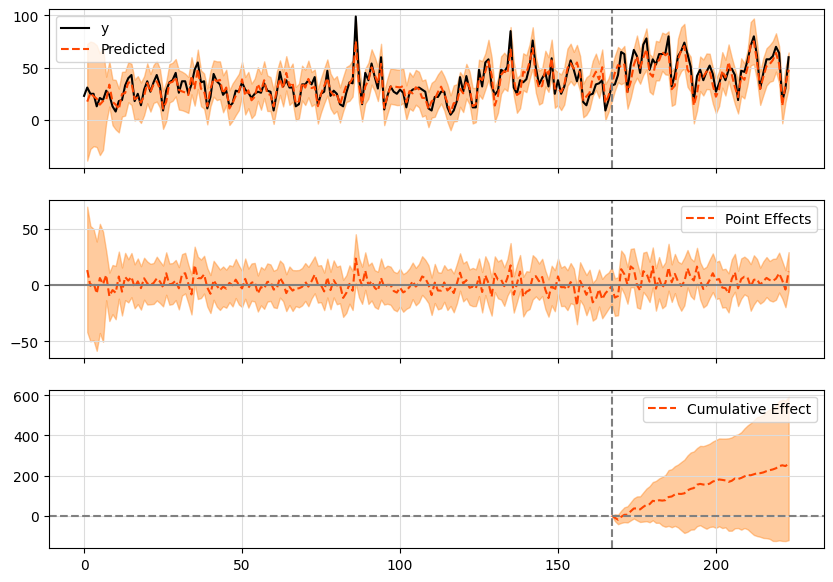

In [52]:
ci = get_ci(7 * 8)
ci.plot()

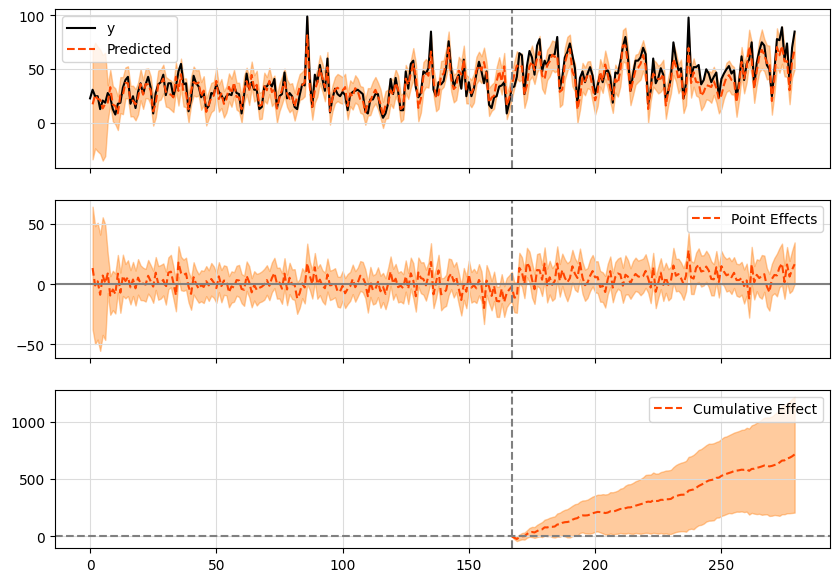

In [53]:
ci = get_ci(7 * 16)
ci.plot()

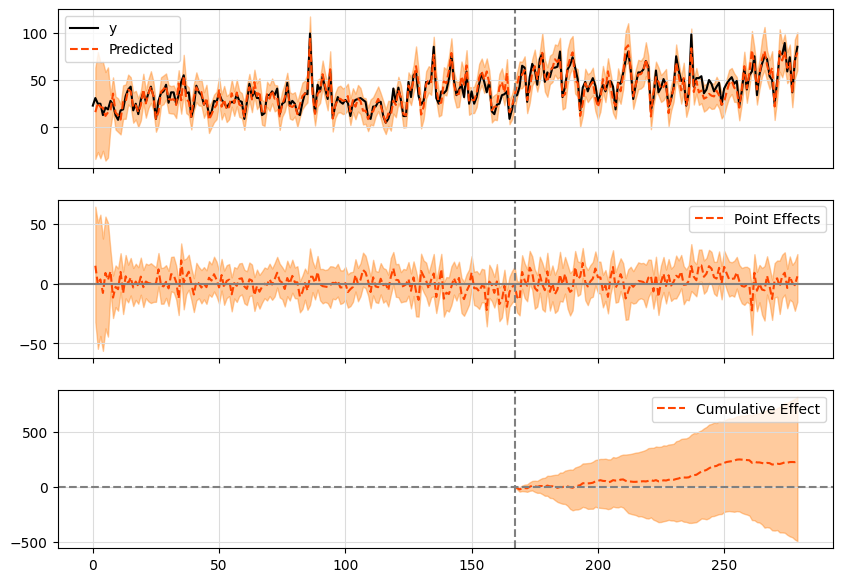

In [54]:
ci = get_ci(7 * 16)
ci.plot()

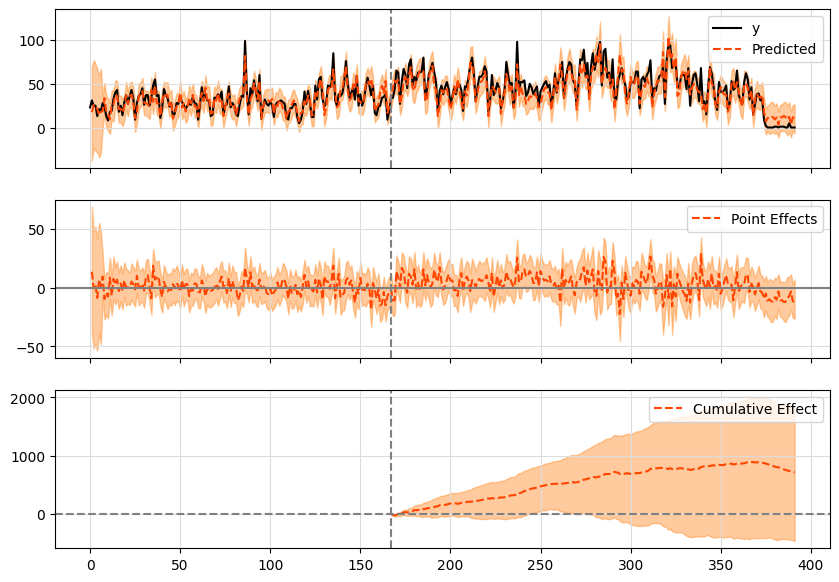

In [56]:
ci = get_ci(7 * 32)
ci.plot()

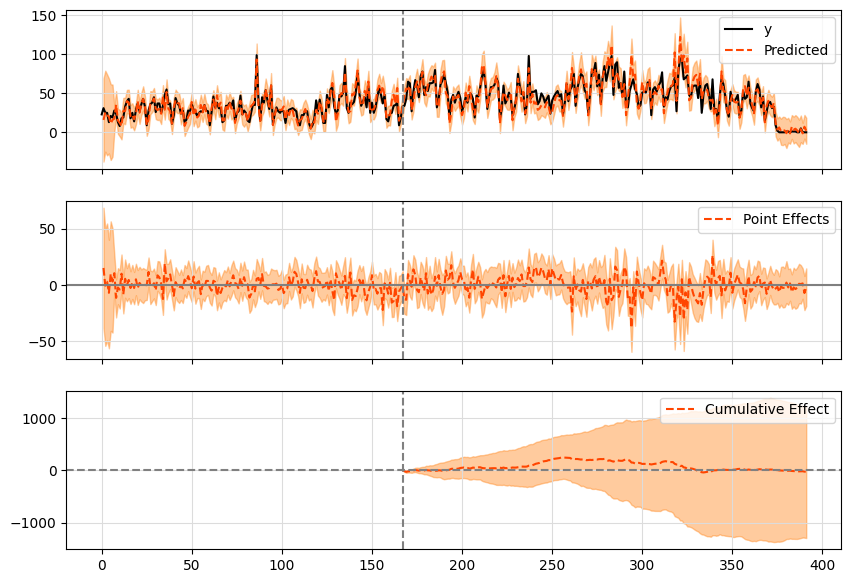

In [55]:
ci = get_ci(7 * 32)
ci.plot()

These are very unstable for longer predictions.

In [57]:
def get_ci_hmc(n_days_predict):
    df = get_regional_counts_for_protest(
        "klima*",
        event,
        pd.DataFrame([event]),
        source="mediacloud",
        n_days_train=split,
        n_days_predict=n_days_predict,
        n_days_protest_free_pre=0,
        n_days_protest_free_post=0,
        min_control_regions=1,
        min_count=3,
    )

    df = (
        df.pivot(index="date", columns="region", values="count")
        .fillna(0)
        .reset_index()
        .drop(columns=["date"])
    )

    df = df[[region] + [c for c in df.columns if c != region]]

    ci = CausalImpact(
        df,
        [0, split - 1],
        [split, len(df) - 1],
        model_args=dict(nseasons=7, fit_method="hmc"),
    )

    return ci

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


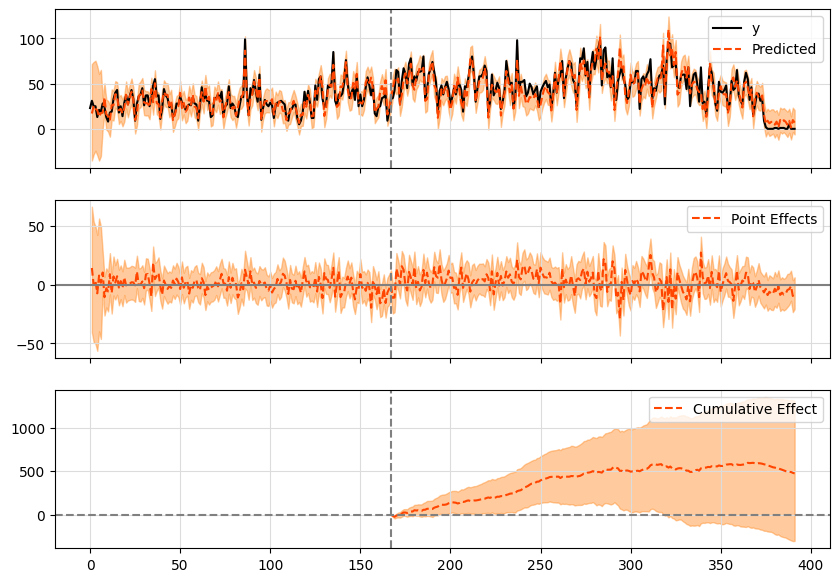

In [58]:
ci = get_ci_hmc(7 * 32)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


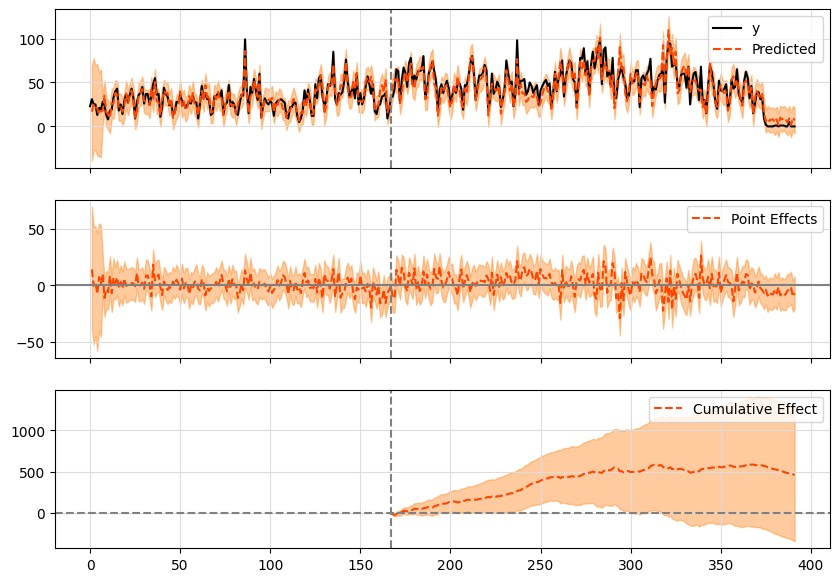

In [59]:
ci = get_ci_hmc(7 * 32)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


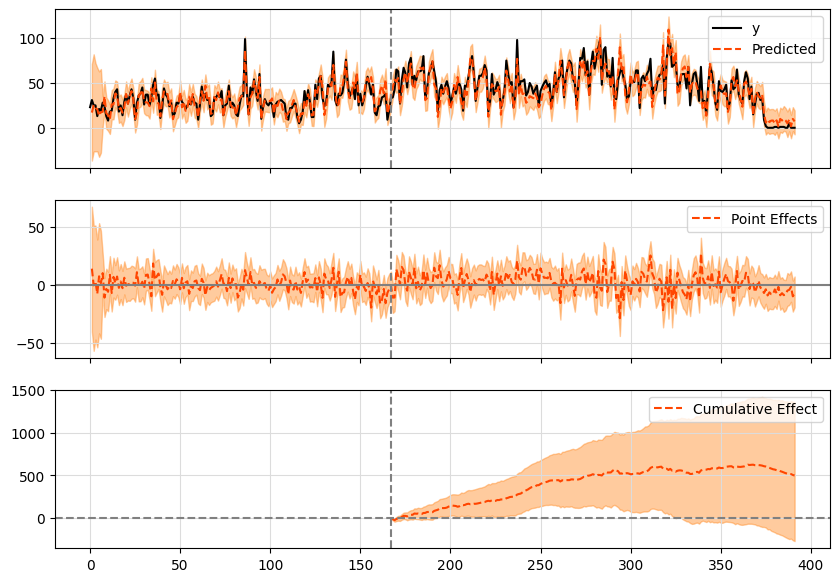

In [60]:
ci = get_ci_hmc(7 * 32)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


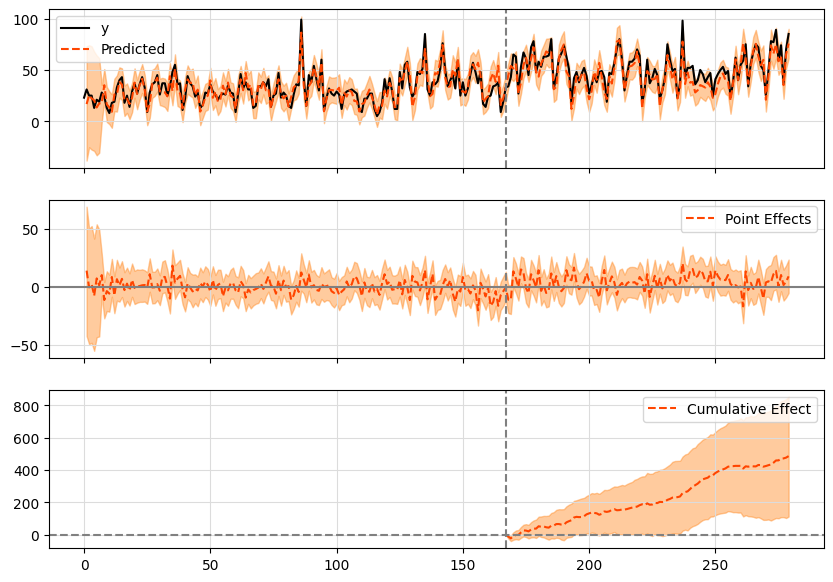

In [61]:
ci = get_ci_hmc(7 * 16)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


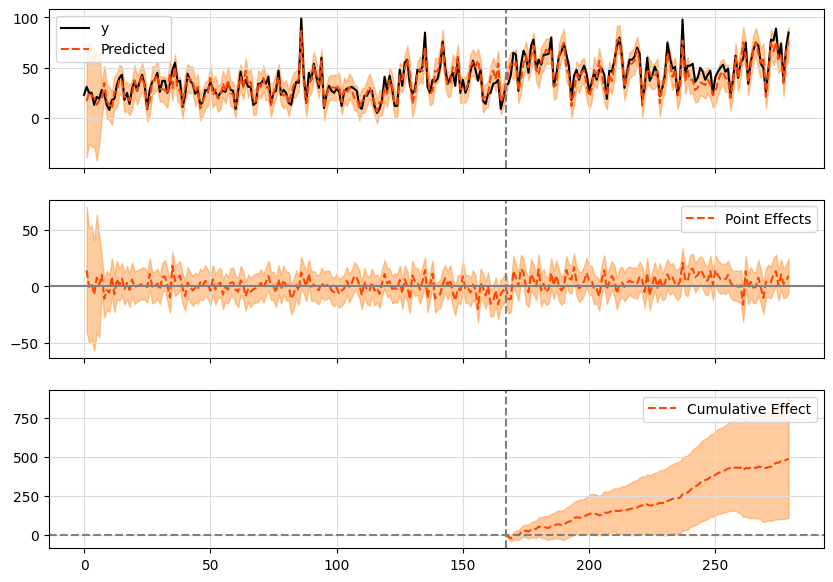

In [62]:
ci = get_ci_hmc(7 * 16)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


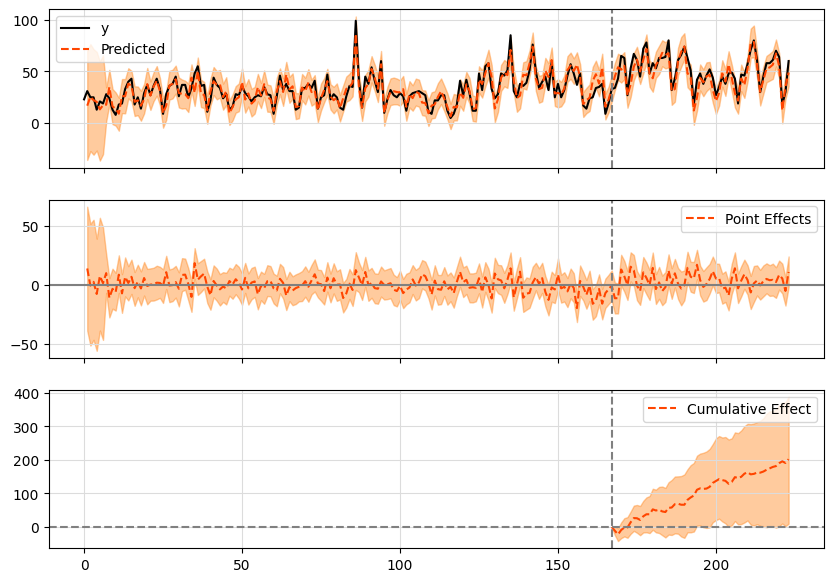

In [63]:
ci = get_ci_hmc(7 * 8)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


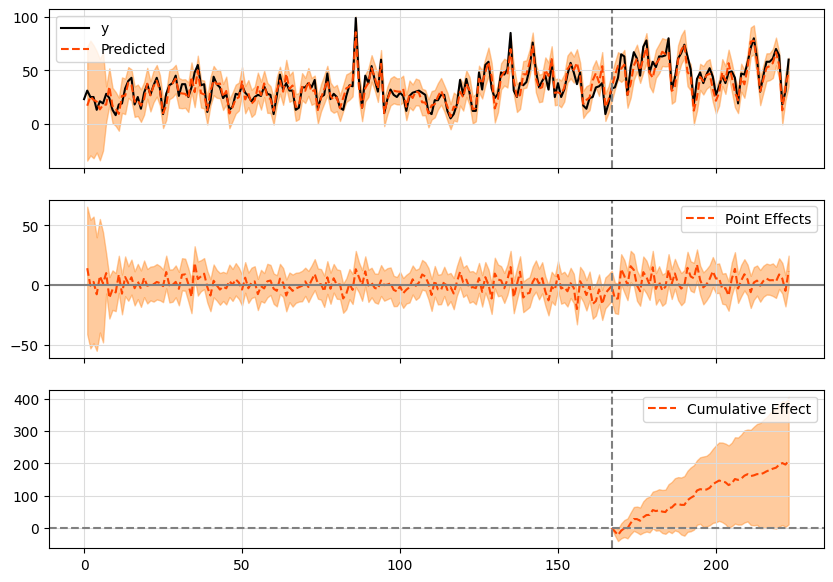

In [64]:
ci = get_ci_hmc(7 * 8)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


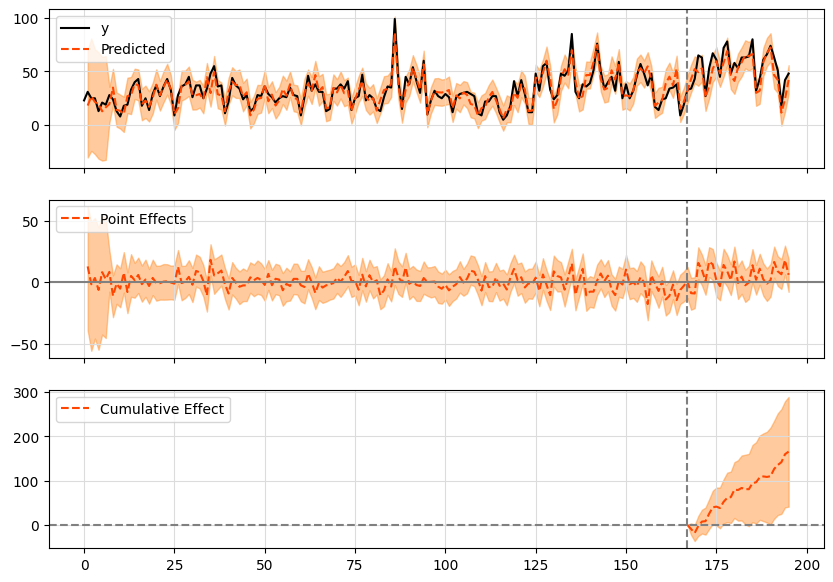

In [65]:
ci = get_ci_hmc(7 * 4)
ci.plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


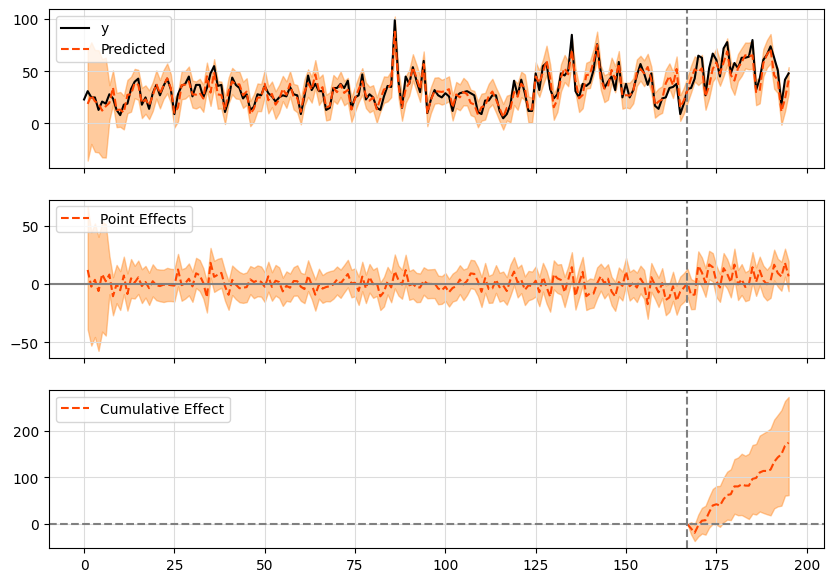

In [66]:
ci = get_ci_hmc(7 * 4)
ci.plot()

In [74]:
def get_ci(prior_level_sd):
    df = get_regional_counts_for_protest(
        "klima*",
        event,
        pd.DataFrame([event]),
        source="mediacloud",
        n_days_train=split,
        n_days_predict=7 * 8,
        n_days_protest_free_pre=0,
        n_days_protest_free_post=0,
        min_control_regions=1,
        min_count=3,
    )

    df = (
        df.pivot(index="date", columns="region", values="count")
        .fillna(0)
        .reset_index()
        .drop(columns=["date"])
    )

    df = df[[region] + [c for c in df.columns if c != region]]

    model_args = dict(nseasons=7, fit_method="hmc")

    if prior_level_sd:
        model_args["prior_level_sd"] = prior_level_sd

    ci = CausalImpact(df, [0, split - 1], [split, len(df) - 1], model_args=model_args)

    return ci

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


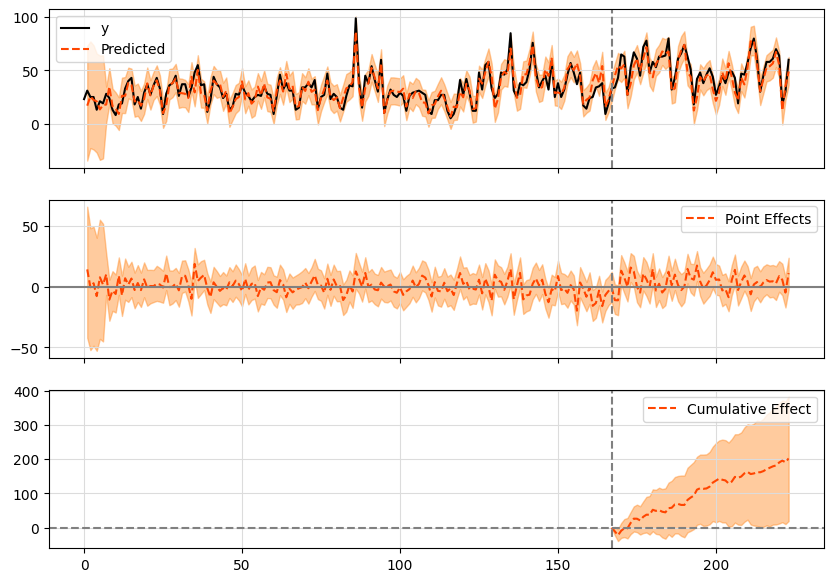

In [71]:
get_ci(0.01).plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


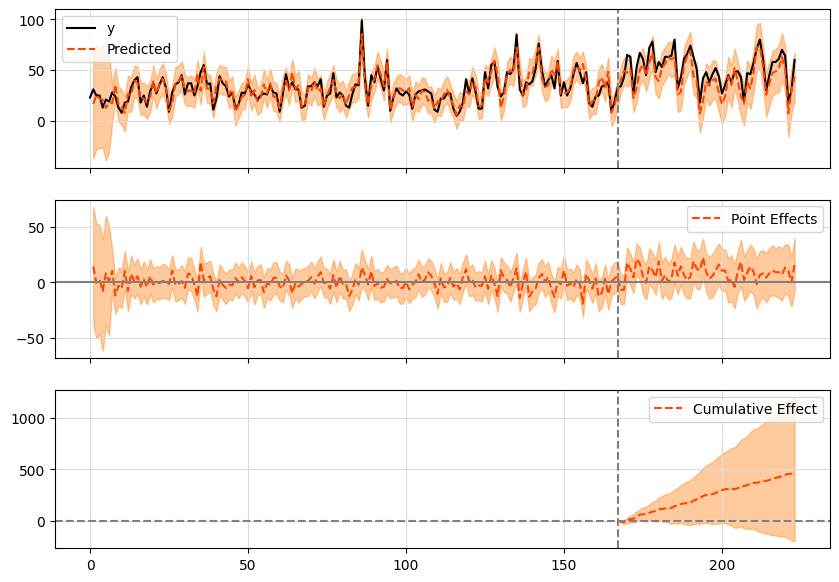

In [72]:
get_ci(0.1).plot()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


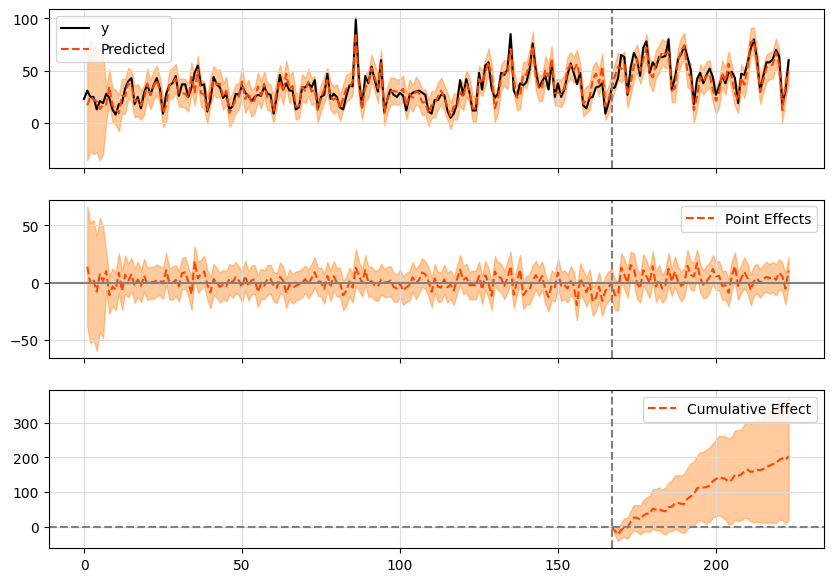

In [75]:
get_ci(None).plot()

In [21]:
df = get_regional_counts_for_protest(
    "klima*",
    event,
    pd.DataFrame([event]),
    source="mediacloud",
    n_days_train=84,
    n_days_predict=28,
    n_days_protest_free_pre=0,
    n_days_protest_free_post=0,
    min_control_regions=1,
    min_count=3,
)

df = df.pivot(index="date", columns="region", values="count").fillna(0).reset_index()

In [22]:
import numpy as np

df.Berlin[df.date >= event["event_date"]] = np.inf
df = df.drop(columns=["date"])
df

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_18763/3217940069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Berlin[df.date >= event["event_date"]] = np.inf


region  Bayern  Berlin  Brandenburg  Hamburg  Hessen  Niedersachsen  \
0          100    36.0            7       17     169            107   
1          162    35.0           13       17     105            116   
2          132    99.0           10       80      85             67   
3          124    41.0            7       19      46             64   
4           40    15.0            2       10      56             24   
..         ...     ...          ...      ...     ...            ...   
107        175     inf           11       34     174            139   
108        148     inf           14       26      71            153   
109         37     inf            4        8      29             55   
110         86     inf            4       11     118             51   
111        167     inf           11       28     121            130   

region  Nordrhein-Westfalen  Rheinland-Pfalz  Saarland  Sachsen  \
0                       105               22         6       18   
1                        99               19        13       26   
2                       101               12         8       15   
3                        72               10         4       13   
4                        46                7         2        8   
..                      ...              ...       ...      ...   
107                     146               23         9       40   
108                     116               15         9       41   
109                      52                3         2       19   
110                      63               11         5        9   
111                     125               15        14       26   

region  Schleswig-Holstein  
0                       24  
1                       25  
2                       17  
3                       18  
4                       11  
..                     ...  
107                     33  
108                     32  
109                     16  
110                      8  
111                     20  

[112 rows x 11 columns]

In [23]:
df = df[[region] + [c for c in df.columns if c != region]]
split = 84
ci = CausalImpact(
    df,
    [0, split - 1],
    [split, len(df) - 1],
    model_args=dict(nseasons=7, fit_method="vi"),
)

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [28]:
ci.inferences.complete_preds_means

0      35.753670
1      37.620796
2      81.448029
3      37.359478
4      27.767029
         ...    
107    51.828880
108    42.304825
109    13.271887
110    24.942867
111    42.692070
Name: complete_preds_means, Length: 112, dtype: float32

In [29]:
ci.inferences.post_preds_means

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
107    51.828880
108    42.304825
109    13.271887
110    24.942867
111    42.692070
Name: post_preds_means, Length: 112, dtype: float32

In [4]:
from protest_impact.data.protests import get_climate_protests
from protest_impact.synthetic_region import evaluate_multiple_protests
from protest_impact.synthetic_region.models import BayesianStructuralTimeSeries

events = get_climate_protests()
results, agg_df = evaluate_multiple_protests(
    "klima*",
    events=events.sample(10),
    reference_events=events,
    source="mediacloud",
    data_kwargs=dict(
        n_days_train=7 * 4 * 12,
        n_days_predict=7 * 4,
        n_days_protest_free_pre=1,
        n_days_protest_free_post=1,
        min_control_regions=3,
    ),
    method_kwargs=dict(
        method=BayesianStructuralTimeSeries,
    ),
)

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

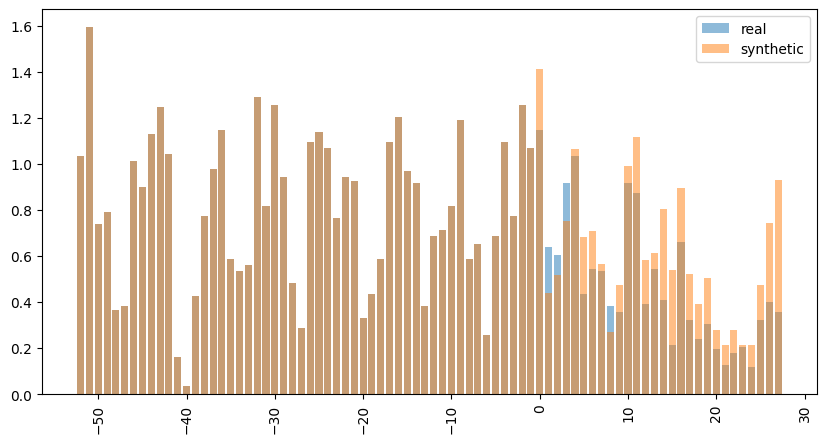

In [10]:
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

plot_comparison(agg_df.iloc[-80:])

(<Figure size 1000x500 with 1 Axes>, <Axes: ylabel='difference'>)

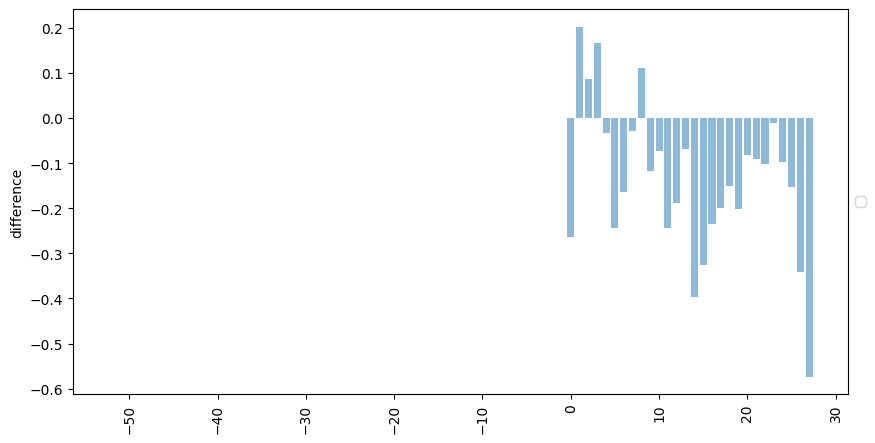

In [16]:
plot_difference(agg_df.iloc[-80:])

In [ ]:
for result in results:
    plot_difference(result["df"].iloc[-80:])

More events:

In [19]:
events = get_climate_protests()
results, agg_df = evaluate_multiple_protests(
    "klima*",
    events=events.sample(50),
    reference_events=events,
    source="mediacloud",
    data_kwargs=dict(
        n_days_train=7 * 4 * 12,
        n_days_predict=7 * 4,
        n_days_protest_free_pre=1,
        n_days_protest_free_post=1,
        min_control_regions=3,
    ),
    method_kwargs=dict(
        method=BayesianStructuralTimeSeries,
    ),
)

  0%|          | 0/50 [00:00<?, ?it/s]

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/

: 

: 

In [ ]:
plot_difference(agg_df.iloc[-80:])

In [11]:
from protest_impact.data.protests.random import get_random_events

random_events = get_random_events(100)
random_results, random_agg_df = evaluate_multiple_protests(
    "klima*",
    events=random_events.sample(10),
    reference_events=random_events,
    source="mediacloud",
    data_kwargs=dict(
        n_days_train=7 * 4 * 12,
        n_days_predict=7 * 4,
        n_days_protest_free_pre=1,
        n_days_protest_free_post=1,
        min_control_regions=3,
    ),
    method_kwargs=dict(
        method=BayesianStructuralTimeSeries,
    ),
)

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '
/Users/

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

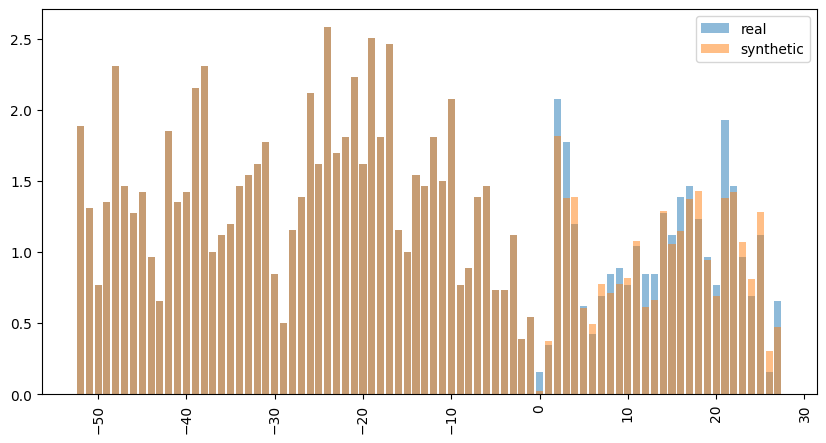

In [13]:
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

plot_comparison(random_agg_df.iloc[-80:])